In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.patches as mpatches
import pickle
import os
import math


In [48]:
class data_visualisation:
    def __init__(self, df, instance):
        self.df=df
        self.df=self.df[self.df['Instance']==instance]
                                
    def summarise_and_plot(self):

        # Define the parameters to plot
        parameters = ['Cp', 'Number childrens', 'Desired expansion policy', 'Desired simulation policy', 'Desired selection policy',"Ratio expansion"]

        # Calculate figure size based on the number of parameters
        num_params = len(parameters)
        fig_width = 6 * num_params  # 6 units width per parameter
        fig_height = 6  # Keep the height fixed for each row

        # Plotting Time to Find Solution vs parameters in the first row
        plt.figure(figsize=(fig_width, fig_height * 2))

        for i, param in enumerate(parameters):
            plt.subplot(2, num_params, i + 1)  # First row
            sns.violinplot(x=param, y='Time to find the solution', data=self.df, inner="quartile", split=True)
            plt.title(f'Time to Find Solution vs {param}')
            plt.xlabel(param)
            plt.ylabel('Time to Find Solution (seconds)')

        # Plotting Total Cost vs parameters in the second row
        for i, param in enumerate(parameters):
            plt.subplot(2, num_params, i + 1 + num_params)  # Second row
            sns.violinplot(x=param, y='Best node - cost', data=self.df, inner="quartile", split=True)
            plt.title(f'Total Cost vs {param}')
            plt.xlabel(param)
            plt.ylabel('Total Cost')

        plt.tight_layout()
        plt.show()
        
    def plot_selection_simulation_counts(self, instance_number):
        # Create the DataFrame
        df = self.df.copy()

        # Filter the DataFrame by the specific instance number
        instance_str = f'{instance_number}.in.in'
        df_instance = df[df['Instance Path'] == instance_str]

        if df_instance.empty:
            print(f"No data found for instance {instance_number}")
            return
        
        # Create the Parameters column by removing the trailing "_digit.log"
        df_instance['Parameters'] = df_instance['File'].str.extract(r'(.+)_\d+\.log')

        # Melt the DataFrame to create a single 'Counts' column with 'Category' as Selections/Simulations
        melted_df = pd.melt(df_instance, id_vars=['Parameters'], value_vars=['Number of Selection', 'Number of Simulation'], 
                            var_name='Category', value_name='Counts')

        # Replace 'Number of Selection' and 'Number of Simulation' with more readable labels
        melted_df['Category'] = melted_df['Category'].replace({
            'Number of Selection': 'Selections',
            'Number of Simulation': 'Simulations'
        })
        
        scaler = MinMaxScaler()
        melted_df['Scaled Counts'] = scaler.fit_transform(melted_df[['Counts']])


        # Set up the plot
        plt.figure(figsize=(16, 8))

        # Plot the violin plot with 'Parameters' on x-axis and 'Counts' on y-axis, with 'Category' differentiating the hue
        sns.violinplot(x='Parameters', y='Counts', hue='Category', data=melted_df, split=True, inner="quartile", palette={"Selections": "skyblue", "Simulations": "lightgreen"})

        # Add labels and title
        plt.title(f'Number of Selections and Simulations for Instance {instance_number}')
        plt.xlabel('Parameters')
        plt.ylabel('Counts')
        plt.xticks(rotation=45, ha="right")
        plt.legend(title='Category')

        # Show the plot
        plt.tight_layout()
        plt.show()
    
    def cp_vs_cost(self, instance_number):
        # Create the DataFrame
        df = self.df.copy()

        # Filter the DataFrame by the specific instance number
        instance_str = f'{instance_number}.in.in'
        df_instance = df[df['Instance Path'] == instance_str]

        if df_instance.empty:
            print(f"No data found for instance {instance_number}")
            return


        palette = sns.color_palette("pastel", n_colors=len(df_instance['Desired Selection Policy'].unique()))

        plt.figure(figsize=(16, 8))
        sns.violinplot(data=df_instance,  # Ensure to use df_instance
                    x="Cp",
                    y="Total Cost",
                    hue="Desired Selection Policy",
                    palette=palette)  # Apply the pastel palette

        plt.title(f"Cp vs Total Cost by Selection Policy - Instance {instance_number}")
        plt.xlabel("Cp Value")
        plt.ylabel("Total Cost")
        plt.tight_layout()
        plt.show()
        
    def cp_vs_total_time(self, instance_number):
        # Create the DataFrame
        df = self.df.copy()

        # Filter the DataFrame by the specific instance number
        instance_str = f'{instance_number}.in.in'
        df_instance = df[df['Instance Path'] == instance_str]

        if df_instance.empty:
            print(f"No data found for instance {instance_number}")
            return


        palette = sns.color_palette("pastel", n_colors=len(df_instance['Desired Selection Policy'].unique()))

        plt.figure(figsize=(16, 8))
        sns.violinplot(data=df_instance,  # Ensure to use df_instance
                    x="Cp",
                    y="Total time",
                    hue="Desired Selection Policy",
                    palette=palette)  # Apply the pastel palette

        plt.title(f"Cp vs Total time by Selection Policy - Instance {instance_number}")
        plt.xlabel("Cp Value")
        plt.ylabel("Total time")
        plt.tight_layout()
        plt.show()
        
    def cp_vs_number_selection(self, instance_number):
        # Create the DataFrame
        df = self.df.copy()

        # Filter the DataFrame by the specific instance number
        instance_str = f'{instance_number}.in.in'
        df_instance = df[df['Instance Path'] == instance_str]

        if df_instance.empty:
            print(f"No data found for instance {instance_number}")
            return


        palette = sns.color_palette("pastel", n_colors=len(df_instance['Desired Selection Policy'].unique()))

        plt.figure(figsize=(16, 8))
        sns.violinplot(data=df_instance,  # Ensure to use df_instance
                    x="Cp",
                    y="Number of Selection",
                    hue="Desired Selection Policy",
                    palette=palette,
                    split=True)  # Apply the pastel palette

        plt.title(f"Cp vs Total time by Selection Policy - Instance {instance_number}")
        plt.xlabel("Cp Value")
        plt.ylabel("Total time")
        plt.tight_layout()
        plt.show()
        
    def multi_variable_scatter(self, instance_number):
        df = self.df.copy()
        instance_str = f'{instance_number}.in.in'
        df_instance = df[df['Instance Path'] == instance_str]

        if df_instance.empty:
            print(f"No data found for instance {instance_number}")
            return

        sns.pairplot(df_instance, 
                    vars=["Cp", "Total Cost", "Total time","Number of Simulation","Number of Selection"], 
                    hue="Desired Selection Policy", 
                    palette="pastel", 
                    markers=["o", "s", "D", "^"], 
                    plot_kws={'alpha': 0.5})
        plt.suptitle(f'Multi-variable Analysis for Instance {instance_number}', y=1.02)
        plt.show()

Instance 4 comparison

In [49]:
path=r'/Users/adslv/Documents/LU/Term 3/Kiwi_TSP_Challenge/Code/Pickle AXA'

with open(fr'{path}/4.in_5_greedy_policy_ratio_k_0_1_UCB_0_1.log.pkl', 'rb') as file:
    dic_4_0_0 = pickle.load(file)

with open(fr'{path}/4.in_5_greedy_policy_ratio_k_0.5_1_UCB_0_0.log.pkl', 'rb') as file:
    dic_4_0_5 = pickle.load(file)

with open(fr'{path}/4.in_5_greedy_policy_ratio_k_1_1_UCB_0_0.log.pkl', 'rb') as file:
    dic_4_1 = pickle.load(file)

with open(fr'{path}/4.in_5_greedy_policy_ratio_k_1_1_UCB1T_0_0.log.pkl', 'rb') as file:
    dic_4_1_ucbt = pickle.load(file)

with open(fr'{path}/4.in_5_greedy_policy_ratio_k_0.5_1_UCB1T_0_0.log.pkl', 'rb') as file:
    dic_4_0_5_ucbt = pickle.load(file)

with open(fr'{path}/4.in_5_greedy_policy_ratio_k_0_1_UCB1T_0_0.log.pkl', 'rb') as file:
    dic_4_0_0_ucbt = pickle.load(file)

with open(fr'{path}/4.in_10_greedy_policy_ratio_k_0_1_UCB_0_0.log.pkl', 'rb') as file:
    dic_4_0_0_10 = pickle.load(file)

with open(fr'{path}/3_tolerance_20_simulations_raw.pkl', 'rb') as file:
    dic_3_0_5_tolerance = pickle.load(file)

with open(fr'{path}/3.in_5_greedy_policy_ratio_k_0.5_1_UCB_0_0.log.pkl', 'rb') as file:
    dic_3_0_5_greedy = pickle.load(file)

with open(fr'{path}/3_random_20_simulations_raw.pkl', 'rb') as file:
    dic_3_0_5_random = pickle.load(file)

In [50]:
# Combine all dictionaries into a dictionary of dictionaries
combined_dict = {
    'dic_4_0_0': dic_4_0_0,
    'dic_4_0_5': dic_4_0_5,
    'dic_4_1': dic_4_1,
    'dic_4_1_ucbt': dic_4_1_ucbt,
    'dic_4_0_5_ucbt': dic_4_0_5_ucbt,
    'dic_4_0_0_ucbt': dic_4_0_0_ucbt,
    'dic_4_0_0_10': dic_4_0_0_10,
    'dic_3_0_5_tolerance': dic_3_0_5_tolerance,
    'dic_3_0_5_greedy': dic_3_0_5_greedy,
    'dic_3_0_5_random': dic_3_0_5_random,
}

df = pd.DataFrame(combined_dict)

In [51]:
df.transpose()

,Best node - day,Best node - path,Best node - cost,Time to preprocess the data,Time to find the solution,Total time,Number of SELECTION phases,Number of SIMULATION phases,Simulation dictionnary,Number childrens,Desired expansion policy,Desired simulation policy,Desired selection policy,Ratio expansion,Cp,Instance
dic_4_0_0,,,,0.3361,600.3515,600.6876,35887,26414,"{'2': [20345, 19164, 19363, 18649, 19972], '3'...",5,ratio_k,greedy_policy,UCB,0,0,4
dic_4_0_5,41,"[GDN, SXF, CPH, VXO, OSL, HEL, TLL, LED, RIX, ...",16443,0.3042,65.2256,65.5299,5040,3761,"{'2': [18041, 18937, 17973, 18361, 18176], '3'...",5,ratio_k,greedy_policy,UCB,0.5,0,4
dic_4_1,41,"[GDN, SXF, CPH, OSL, BLE, HEL, TLL, LED, RIX, ...",15450,0.3341,48.8409,49.1750,4161,3104,"{'2': [17847, 18176, 18937, 19363, 19103], '3'...",5,ratio_k,greedy_policy,UCB,1,0,4
dic_4_1_ucbt,41,"[GDN, SXF, CPH, OSL, BLE, HEL, TLL, LED, RIX, ...",15450,0.3341,48.8409,49.1750,4161,3104,"{'2': [17847, 18176, 18937, 19363, 19103], '3'...",5,ratio_k,greedy_policy,UCB,1,0,4
dic_4_0_5_ucbt,41,"[GDN, SXF, CPH, OSL, BLE, HEL, TLL, LED, RIX, ...",15450,0.3341,48.8409,49.1750,4161,3104,"{'2': [17847, 18176, 18937, 19363, 19103], '3'...",5,ratio_k,greedy_policy,UCB,1,0,4
dic_4_0_0_ucbt,,,,0.3132,600.3257,600.6389,29037,21373,"{'2': [20794, 17979, 17928, 18061, 19102], '3'...",5,ratio_k,greedy_policy,UCB1T,0,0,4
dic_4_0_0_10,,,,0.3152,600.3318,600.6470,37002,28846,"{'2': [18180, 18998, 17722, 20294, 17847, 2086...",10,ratio_k,greedy_policy,UCB,0,0,4
dic_3_0_5_tolerance,"[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1...","[[GDN, BZG, WE2, LCJ, WAW, LB1, PD1, KRK, SA2,...","[8810, 9107, 9052, 9370, 8441, 8762, 9203, 830...","[1.0415, 1.0415, 0.0104, 0.0104, 0.0104, 0.010...","[2.1065, 5.115, 0.755, 1.6092, 2.4856, 4.8987,...","[3.148, 6.1565, 0.7654, 1.6196, 2.496, 4.9092,...","[232, 344, 215, 191, 187, 244, 272, 245, 394, ...","[167, 253, 155, 138, 140, 177, 198, 176, 285, ...","{'2': [10114, 10355, 12274, 11620, 9609, 10114...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
dic_3_0_5_greedy,14,"[GDN, WE2, BZG, ZC3, IEG, DL1, KTW, KRK, PD1, ...",8638,0.0070,0.7329,0.7399,350,262,"{'2': [9355, 10821, 8827, 8582, 8920], '3': [8...",5,ratio_k,greedy_policy,UCB,0.5,0,3
dic_3_0_5_random,"[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1...","[[GDN, OSZ, BZG, POZ, IEG, KRK, SA1, LD1, WAW,...","[11256, 11745, 8732, 11215, 12185, 10483, 1006...","[0.0305, 0.0305, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0243, 1.7837, 0.5404, 0.8993, 1.2975, 1.887...","[1.0548, 1.8142, 0.5404, 0.8993, 1.2975, 1.887...","[114, 89, 131, 108, 149, 107, 141, 96, 95, 106...","[83, 64, 95, 77, 110, 76, 106, 68, 67, 77, 93,...","{'2': [13279, 18735, 15898, 14572, 20004, 1327...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import make_interp_spline

def plot_multiple_datasets_with_quartile(data_dict, interpolate=True, compare_to_greedy=False, show_boxplot=False,
                                         hide_grid=False, title=None, legend=None, quartile_type='min_max', 
                                         interpolation_type='polynomial', figsize=(16, 12)):
    """
    Plots multiple datasets on the same boxplot graph with a color legend and 
    either smooth curves or points connecting the chosen quartile (min-max, median, or all) values 
    within each dataset across the days. Optionally, compare all distributions 
    by subtracting the first distribution from each dataset (excluding the first dataset from the plot).

    data_dict (dict): Dictionary containing datasets as keys ('data_1', 'data_2', etc.) 
    Parameters:
                      and their corresponding day-wise values as values.
    interpolate (bool): If True, interpolate between the quartile points. If False, just plot the points.
    compare_to_greedy (bool): If True, plot the interpolation and compare all distributions 
                              by subtracting the first distribution from each.
    show_boxplot (bool): If True, show the boxplots. If False, only show the interpolation or points.
    hide_grid (bool): If True, hides the grid on the plot. If False, shows the grid.
    title (str): The title of the plot. If None, a default title is used.
    legend (list of str): Custom legend titles for the datasets. If None, default labels are used.
    quartile_type (str): 'min_max' to plot min-max curves, 'median' to plot median curves, 'min_max_median' to plot all.
    interpolation_type (str): 'polynomial' for polynomial interpolation, 'linear' for linear interpolation.
    figsize (tuple): Size of the plot figure.

    Returns:
    None
    """
    plt.figure(figsize=figsize)

    colors = sns.color_palette("pastel", n_colors=len(data_dict.keys()))
    
    width_offset = 0.4 if show_boxplot else 0  # Space between boxes of different datasets if boxplots are shown
    
    # Get the first distribution to use for comparison
    first_data_key = list(data_dict.keys())[0]
    first_data_values = data_dict[first_data_key]
    
    legend_patches = []
    plot_index = 0  # To manage color assignment

    # Get all unique keys across all datasets and sort them numerically
    all_keys = sorted(set().union(*(data_values.keys() for data_values in data_dict.values())), key=lambda x: int(x))
    x_positions = list(range(1, len(all_keys) + 1))  # Integer positions for the x-axis

    for i, (data_key, data_values) in enumerate(data_dict.items()):
        if compare_to_greedy and data_key == first_data_key:
            continue  # Skip plotting the first distribution if comparing to greedy

        if compare_to_greedy:
            # Subtract the first distribution's values
            data_values = {k: np.array(data_values[k])[:len(first_data_values.get(k, []))] - np.array(first_data_values.get(k, []))[:len(data_values.get(k, []))] 
                          for k in data_values.keys() if k in first_data_values.keys()}
        
        current_positions = [x + plot_index * width_offset for x in x_positions] if show_boxplot else x_positions
        
        if quartile_type in ['min_max', 'min_max_median']:
            q3_values = [np.max(data_values[key]) if key in data_values else np.nan for key in all_keys]
            q1_values = [np.min(data_values[key]) if key in data_values else np.nan for key in all_keys]
        if quartile_type in ['median', 'min_max_median']:
            median_values = [np.median(data_values[key]) if key in data_values else np.nan for key in all_keys]

        if show_boxplot:
            # Plotting each dataset as boxplots
            plt.boxplot([data_values.get(key, []) for key in all_keys], 
                        positions=current_positions, widths=0.2, patch_artist=True,
                        boxprops=dict(facecolor=colors[plot_index % len(colors)]), 
                        labels=[str(int(key)) for key in all_keys] if plot_index == 0 else None)
        
        if interpolate:
            valid_indices = [i for i, val in enumerate(q3_values if quartile_type in ['min_max', 'min_max_median'] else median_values) if not np.isnan(val)]
            x_valid = [current_positions[i] for i in valid_indices]
            if len(x_valid) > 1:  # To avoid errors with interpolation
                x_new = np.linspace(min(x_valid), max(x_valid), 300)
                
                if quartile_type in ['min_max', 'min_max_median']:
                    q3_valid = [q3_values[i] for i in valid_indices]
                    q1_valid = [q1_values[i] for i in valid_indices]
                    if interpolation_type == 'polynomial':
                        q3_spline = make_interp_spline(x_valid, q3_valid, k=3)(x_new)
                        q1_spline = make_interp_spline(x_valid, q1_valid, k=3)(x_new)
                    elif interpolation_type == 'linear':
                        q3_spline = np.interp(x_new, x_valid, q3_valid)
                        q1_spline = np.interp(x_new, x_valid, q1_valid)
                    
                    # Plot the interpolated min and max values within this dataset
                    plt.plot(x_new, q3_spline, color=colors[plot_index % len(colors)], linestyle='-', label=f'Max {data_key}' if plot_index == 0 else "")
                    plt.plot(x_new, q1_spline, color=colors[plot_index % len(colors)], linestyle='-', label=f'Min {data_key}' if plot_index == 0 else "")
                
                if quartile_type in ['median', 'min_max_median']:
                    median_valid = [median_values[i] for i in valid_indices]
                    if interpolation_type == 'polynomial':
                        median_spline = make_interp_spline(x_valid, median_valid, k=3)(x_new)
                    elif interpolation_type == 'linear':
                        median_spline = np.interp(x_new, x_valid, median_valid)
                    
                    # Plot the interpolated median values within this dataset
                    plt.plot(x_new, median_spline, color=colors[plot_index % len(colors)], linestyle='--', label=f'Median {data_key}' if plot_index == 0 else "")
        else:
            if quartile_type in ['min_max', 'min_max_median']:
                plt.plot(current_positions, q3_values, color=colors[plot_index % len(colors)], linestyle='None', marker='o', label=f'Max {data_key}' if plot_index == 0 else "")
                plt.plot(current_positions, q1_values, color=colors[plot_index % len(colors)], linestyle='None', marker='o', label=f'Min {data_key}' if plot_index == 0 else "")
            if quartile_type in ['median', 'min_max_median']:
                plt.plot(current_positions, median_values, color=colors[plot_index % len(colors)], linestyle='--', marker='o', label=f'Median {data_key}' if plot_index == 0 else "")

        # Create a patch for the legend
        legend_label = legend[i] if legend and i < len(legend) else f"Dataset {i+1}"
        legend_patches.append(mpatches.Patch(color=colors[plot_index % len(colors)], label=legend_label))
        
        plot_index += 1  # Increment plot index for next dataset

    # Adjusting the x-axis to show integer labels only
    plt.xticks(x_positions, [str(int(key)) for key in all_keys])

    plt.xlabel('Day')
    plt.ylabel('Total cost')
    
    # Set custom title if provided
    if title:
        plt.title(title)
    else:
        plt.title('Comparison of Multiple Datasets by Day with Quartile Points/Lines')
    
    # Show or hide the grid
    if not hide_grid:
        plt.grid(True)
    else:
        plt.grid(False)
    
    plt.legend(handles=legend_patches, loc="upper right")
    plt.show()

/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],


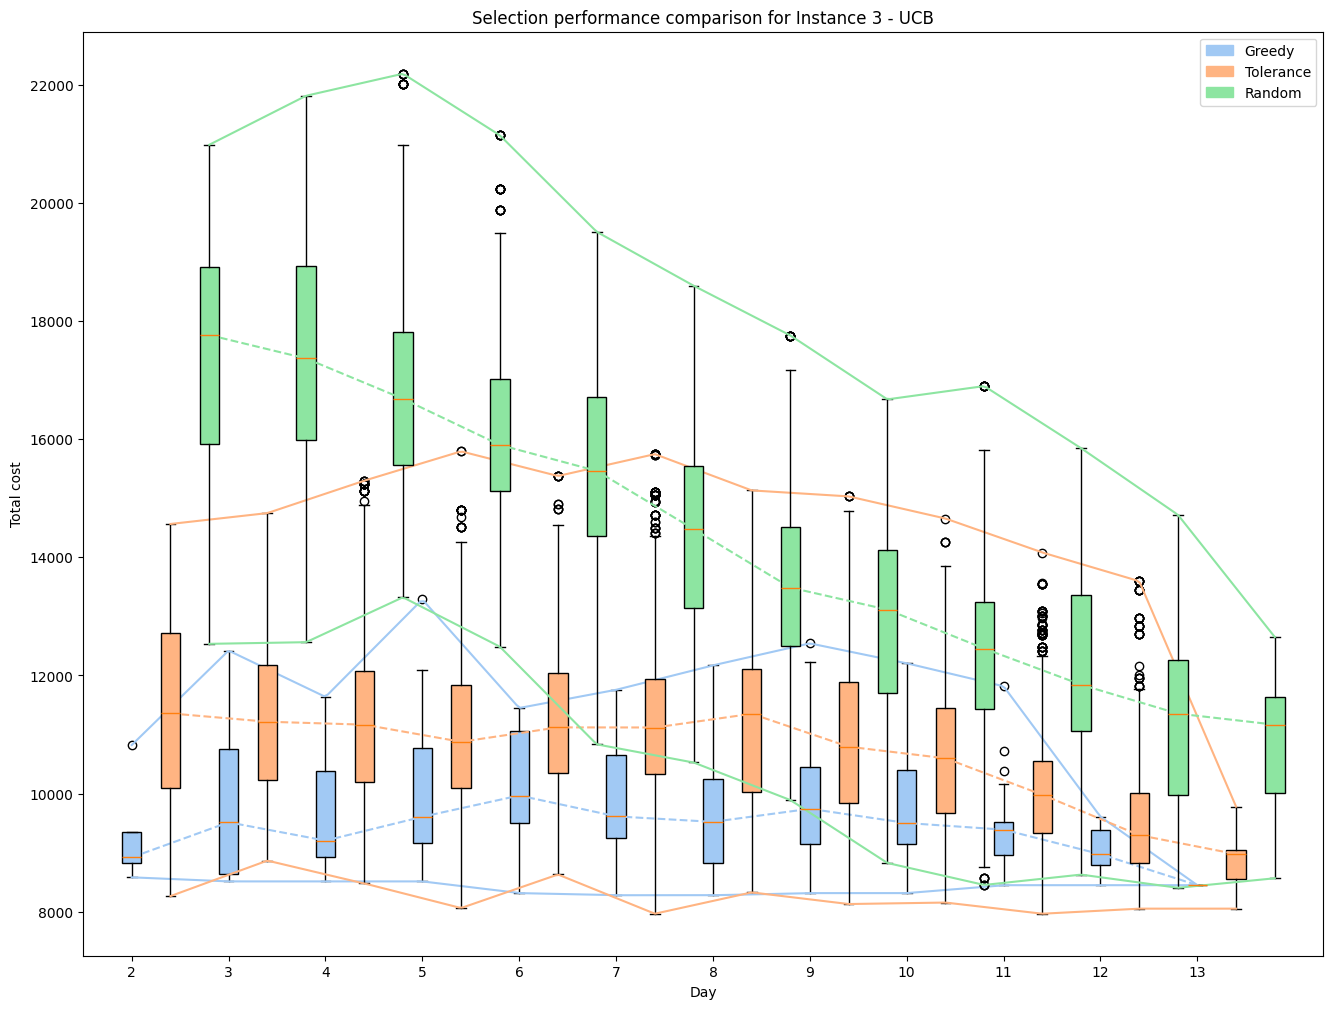

In [53]:
plot_multiple_datasets_with_quartile(
    {'data_1': dic_3_0_5_greedy['Simulation dictionnary'], 
     'data_2': dic_3_0_5_tolerance['Simulation dictionnary'],
     'data_3': dic_3_0_5_random['Simulation dictionnary']},
    hide_grid=True, 
    title="Selection performance comparison for Instance 3 - UCB", 
    legend=["Greedy", "Tolerance", "Random"],
    compare_to_greedy=False,
    show_boxplot=True,
    interpolate=True,
    quartile_type='min_max_median',
    interpolation_type='linear',
    figsize=(16, 12)
)

### Instance 3 - Analysis expansion policy

/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],


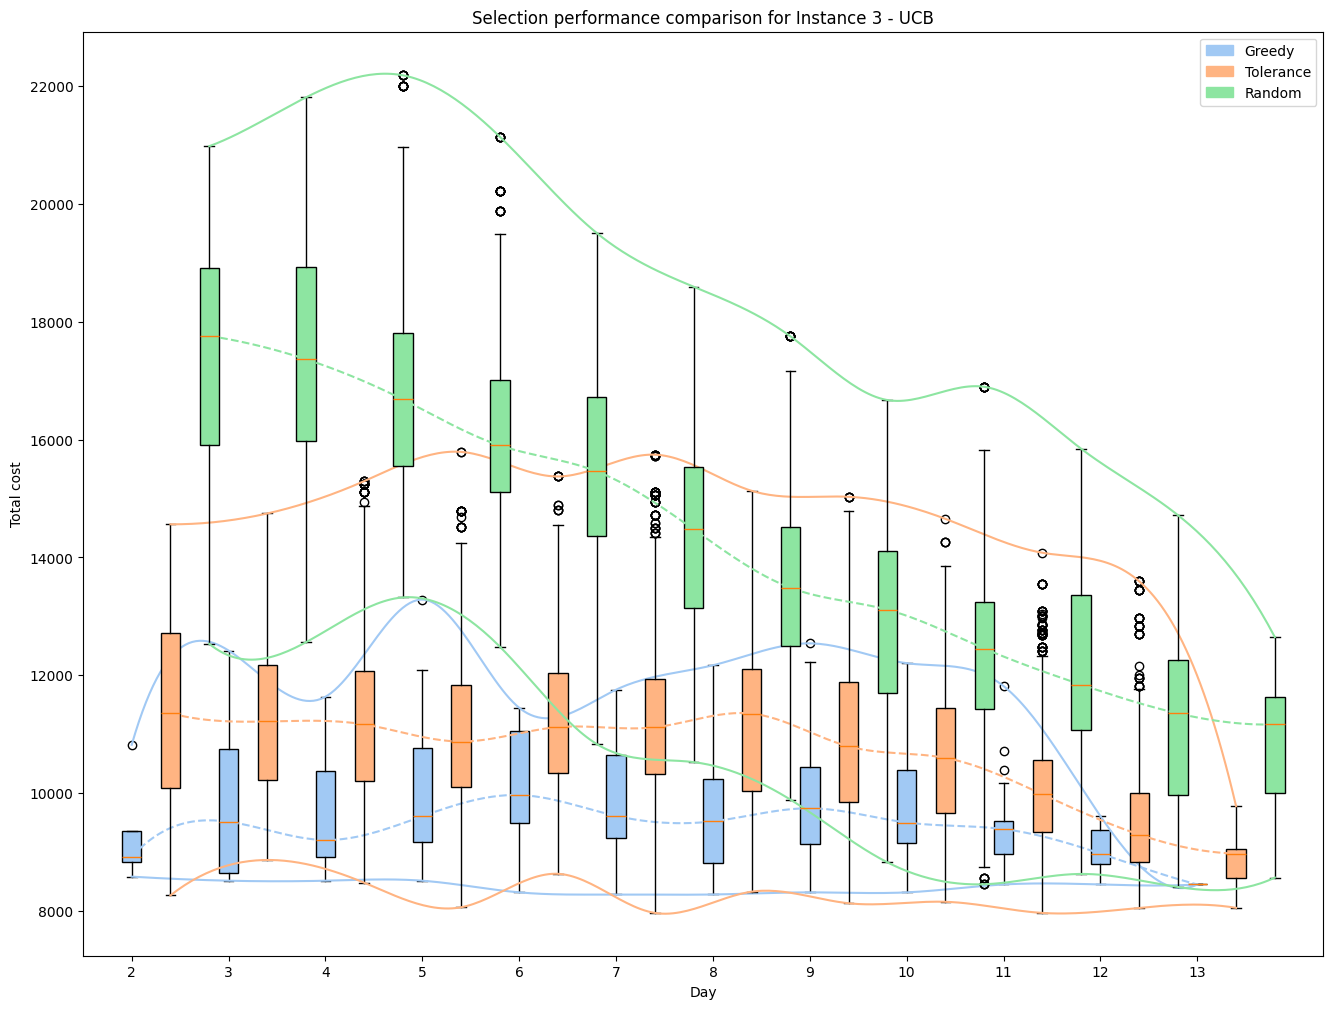

In [54]:
plot_multiple_datasets_with_quartile(
    {
        'data_1': dic_3_0_5_greedy['Simulation dictionnary'], 
        'data_2': dic_3_0_5_tolerance['Simulation dictionnary'],
        'data_3': dic_3_0_5_random['Simulation dictionnary']
    },
    hide_grid=True,  # Set to True to hide the grid lines on the plot, False to show them
    title="Selection performance comparison for Instance 3 - UCB",  # Title of the plot; if None, a default title is used
    legend=["Greedy", "Tolerance", "Random"],  # List of legend labels corresponding to the datasets
    compare_to_greedy=False,  # If True, compare each dataset to the first one by subtracting its values
    show_boxplot=True,  # Set to True to display boxplots for the data, False to omit boxplots
    interpolate=True,  # Set to True to interpolate between points, False to just plot the raw points
    quartile_type='min_max_median',  # 'min_max' to plot min and max curves, 'median' to plot the median curve, 'min_max_median' to plot all three
    interpolation_type='polynomial',  # 'polynomial' for smooth cubic spline interpolation, 'linear' for straight-line interpolation
    figsize=(16, 12)  # Tuple specifying the size of the plot (width, height) in inches
)

### Instance 4 - Ratio expansion

/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],


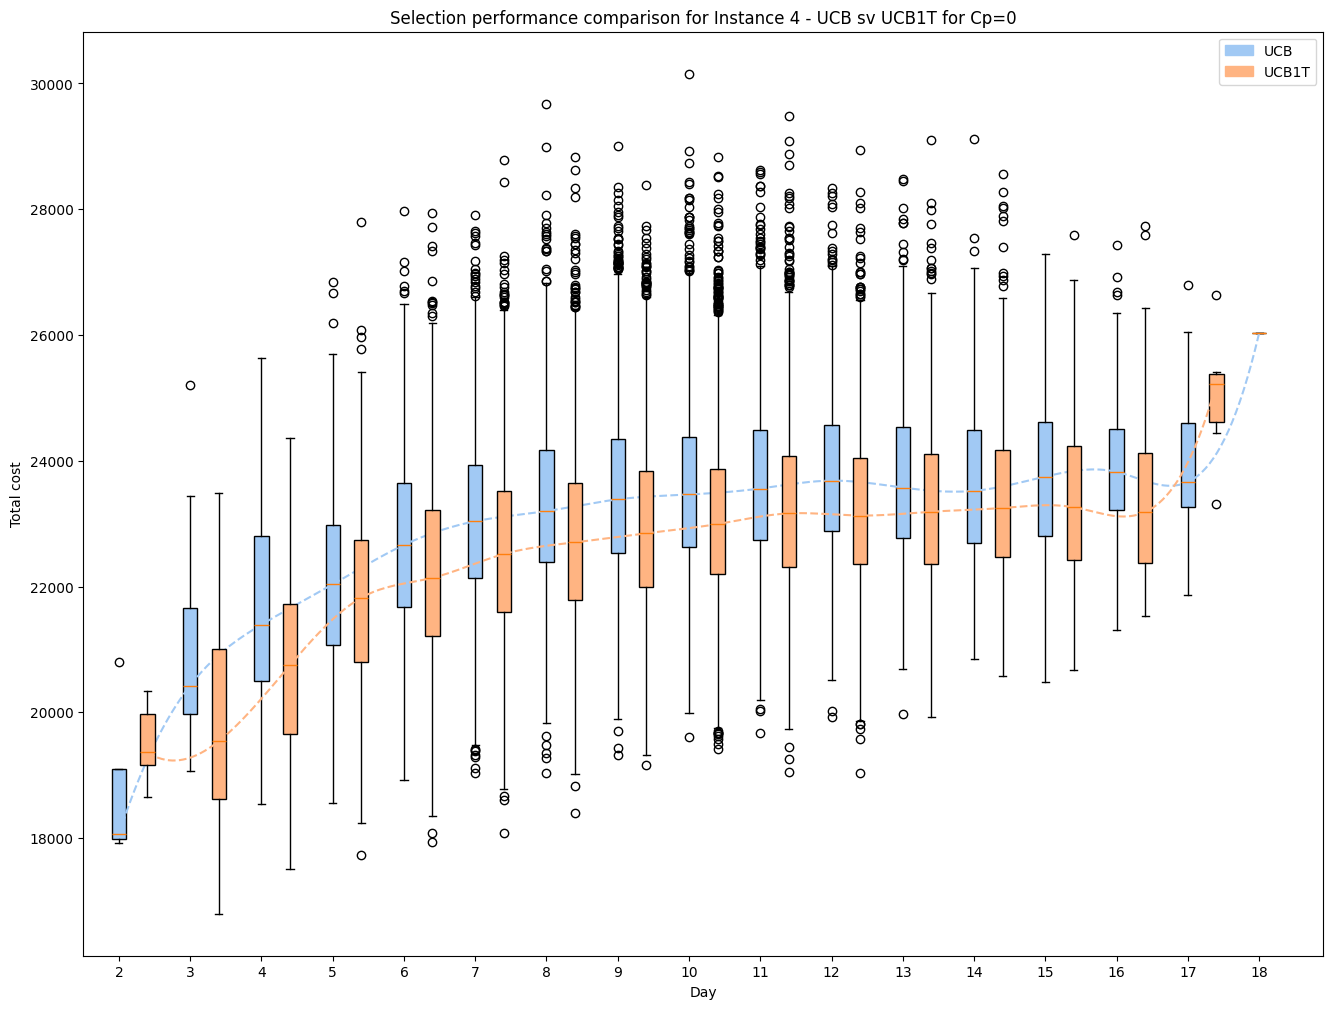

In [55]:
plot_multiple_datasets_with_quartile(
    {'data_1': dic_4_0_0_ucbt['Simulation dictionnary'], 
     'data_2': dic_4_0_0['Simulation dictionnary']},
    hide_grid=True, 
    title="Selection performance comparison for Instance 4 - UCB sv UCB1T for Cp=0", 
    legend=["UCB","UCB1T"],
    compare_to_greedy=False,
    show_boxplot=True,
    interpolate=True,
    quartile_type='median',  # Choose 'min_max' or 'median' based on what you want to plot
    interpolation_type='polynomial',  # Choose 'linear' or 'polynomial' based on your interpolation preference
    figsize=(16, 12),  # Adjust the plot size if needed
)

/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],


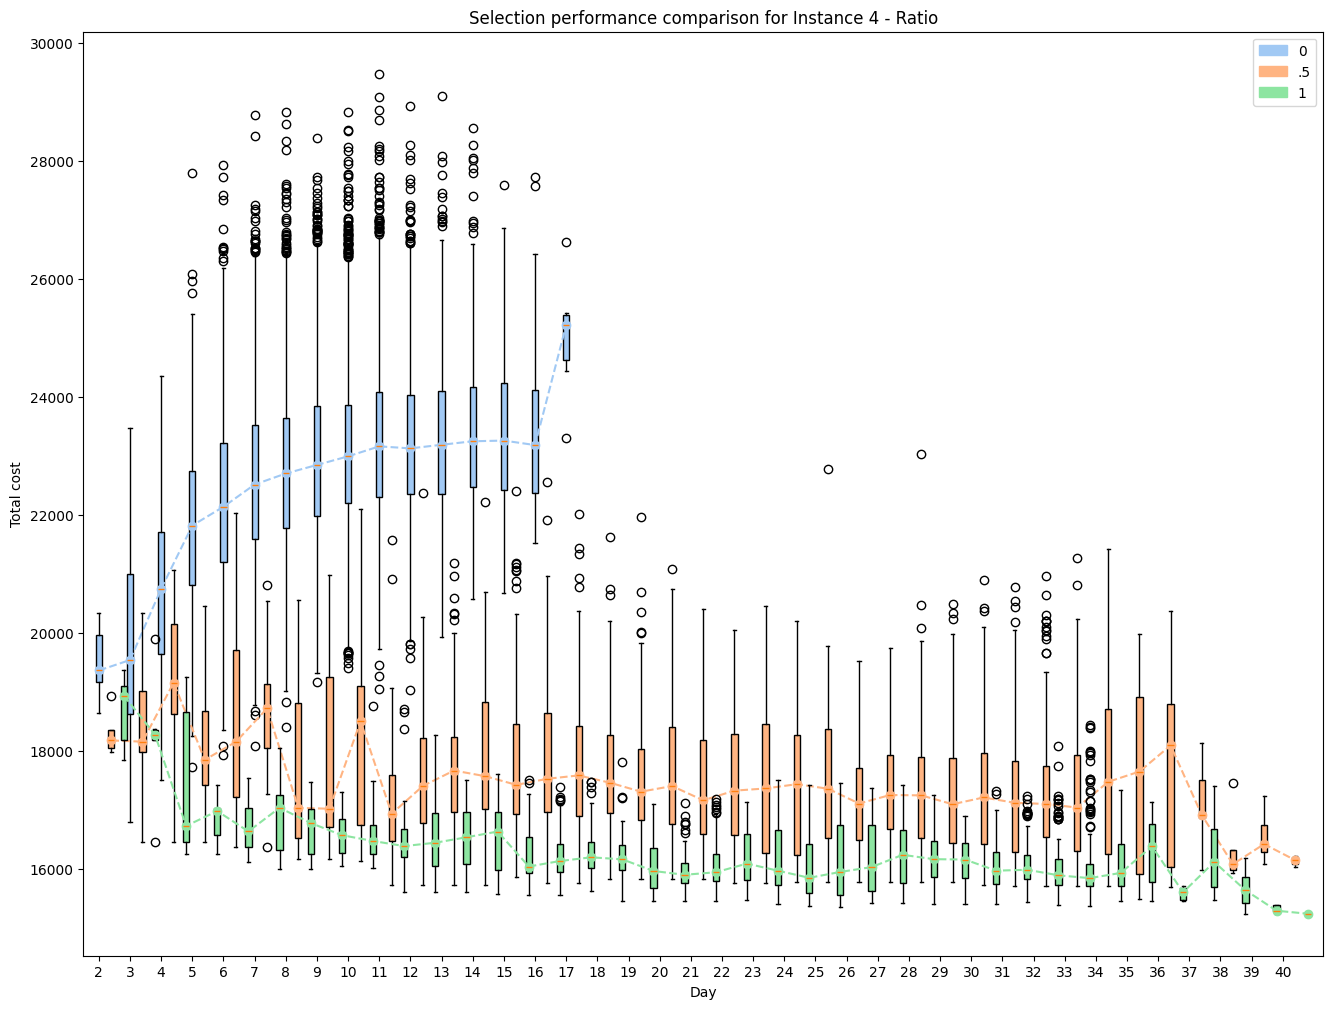

In [56]:
plot_multiple_datasets_with_quartile(
    {'data_1': dic_4_0_0['Simulation dictionnary'], 
     'data_2': dic_4_0_5['Simulation dictionnary'],
    'data_3': dic_4_1['Simulation dictionnary']},
    hide_grid=True, 
    title="Selection performance comparison for Instance 4 - Ratio", 
    legend=["0",".5","1"],
    compare_to_greedy=False,
    show_boxplot=True,
    interpolate=False,
    quartile_type='median',  # Choose 'min_max' or 'median' based on what you want to plot
    interpolation_type='polynomial',  # Choose 'linear' or 'polynomial' based on your interpolation preference
    figsize=(16, 12),  # Adjust the plot size if needed
)

/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551

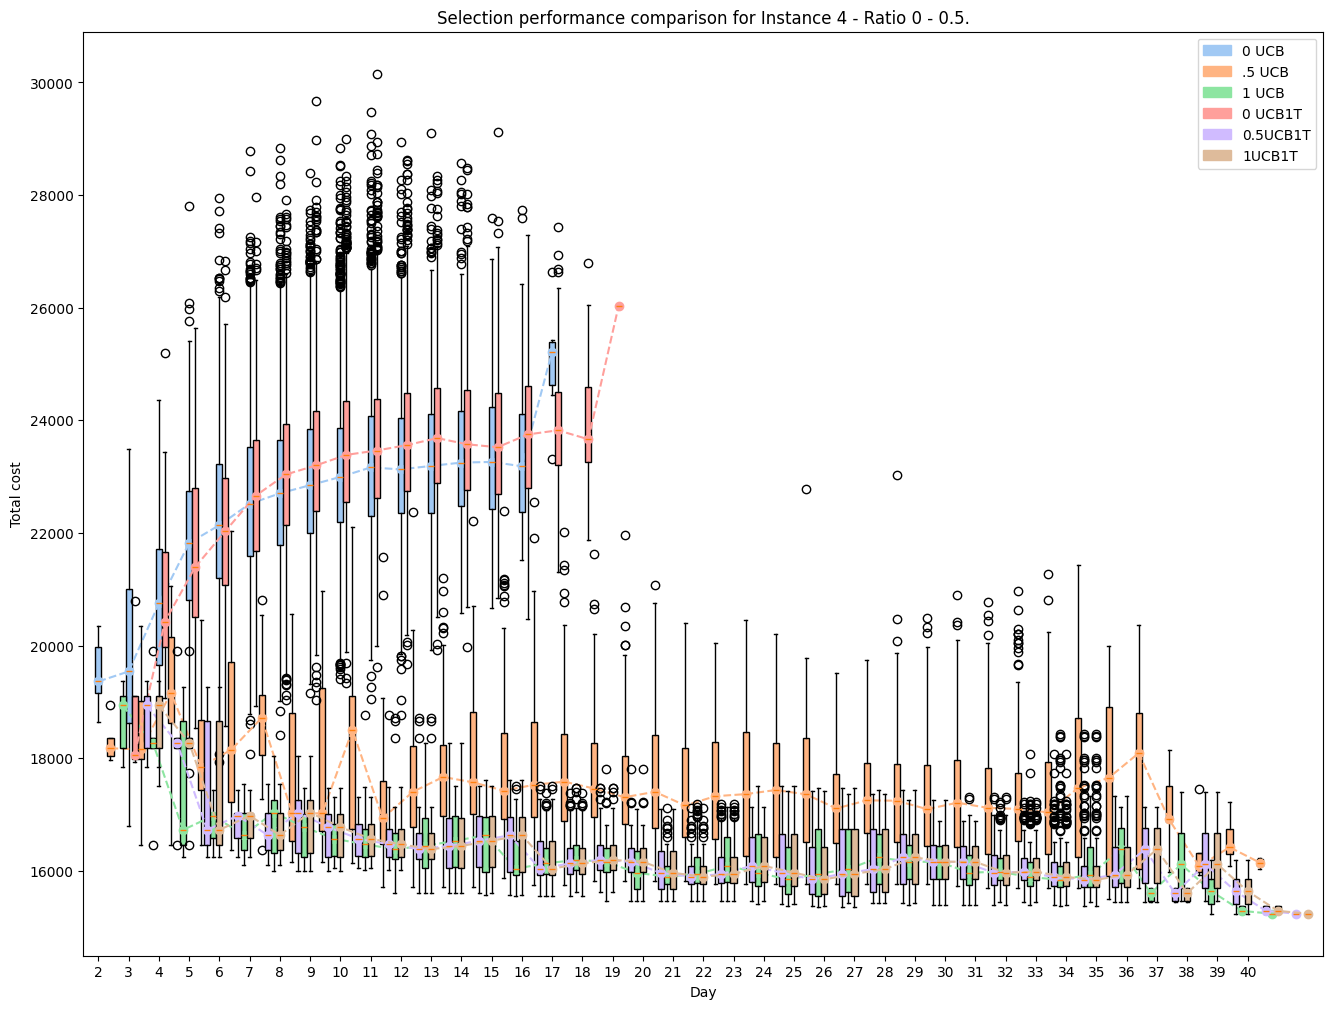

In [57]:
plot_multiple_datasets_with_quartile(
    {
    'data_1': dic_4_0_0['Simulation dictionnary'], 
    'data_2': dic_4_0_5['Simulation dictionnary'],
    'data_3': dic_4_1['Simulation dictionnary'],
    'data_4':dic_4_0_0_ucbt['Simulation dictionnary'],
    'data_5':dic_4_0_5_ucbt['Simulation dictionnary'],
    'data_6':dic_4_1_ucbt['Simulation dictionnary']},
    hide_grid=True, 
    title="Selection performance comparison for Instance 4 - Ratio 0 - 0.5.", 
    legend=["0 UCB",".5 UCB","1 UCB","0 UCB1T","0.5UCB1T","1UCB1T"],
    compare_to_greedy=False,
    show_boxplot=True,
    interpolate=False,
    quartile_type='median',  # Choose 'min_max' or 'median' based on what you want to plot
    interpolation_type='polynomial',  # Choose 'linear' or 'polynomial' based on your interpolation preference
    figsize=(16, 12),  # Adjust the plot size if needed
)

/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],


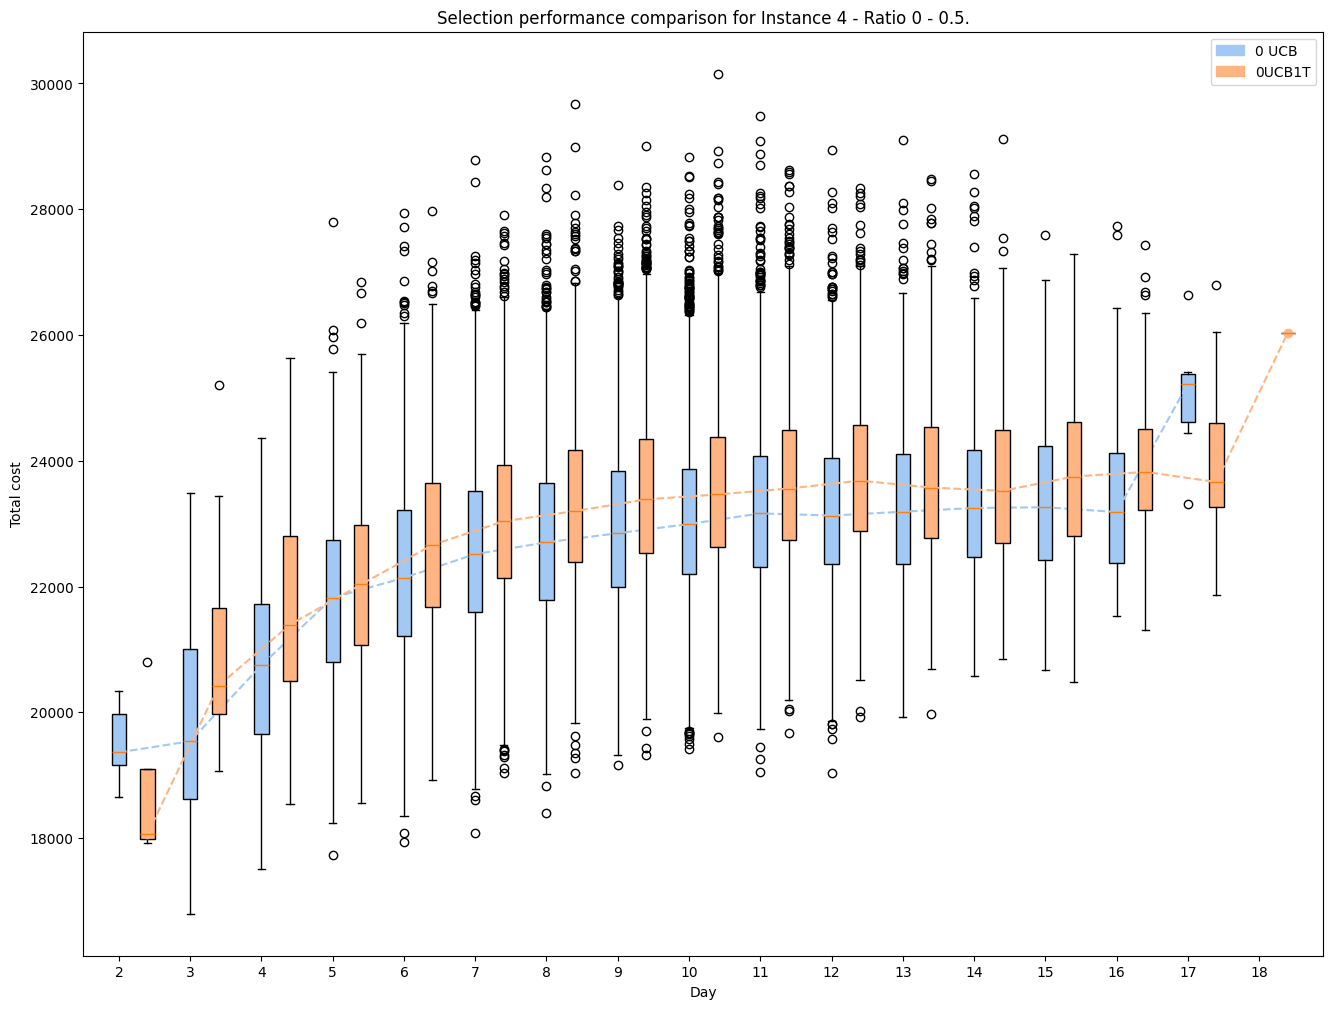

In [58]:
plot_multiple_datasets_with_quartile(
    {
    'data_1': dic_4_0_0['Simulation dictionnary'], 
    'data_4':dic_4_0_0_ucbt['Simulation dictionnary'],
   },
    hide_grid=True, 
    title="Selection performance comparison for Instance 4 - Ratio 0 - 0.5.", 
    legend=["0 UCB","0UCB1T"],
    compare_to_greedy=False,
    show_boxplot=True,
    interpolate=False,
    quartile_type='median',  # Choose 'min_max' or 'median' based on what you want to plot
    interpolation_type='polynomial',  # Choose 'linear' or 'polynomial' based on your interpolation preference
    figsize=(16, 12),  # Adjust the plot size if needed
)

/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],
/var/folders/j7/pm3l9xwx0w5d65kp68nzsdz40000gn/T/ipykernel_13551/30784921.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_values.get(key, []) for key in all_keys],


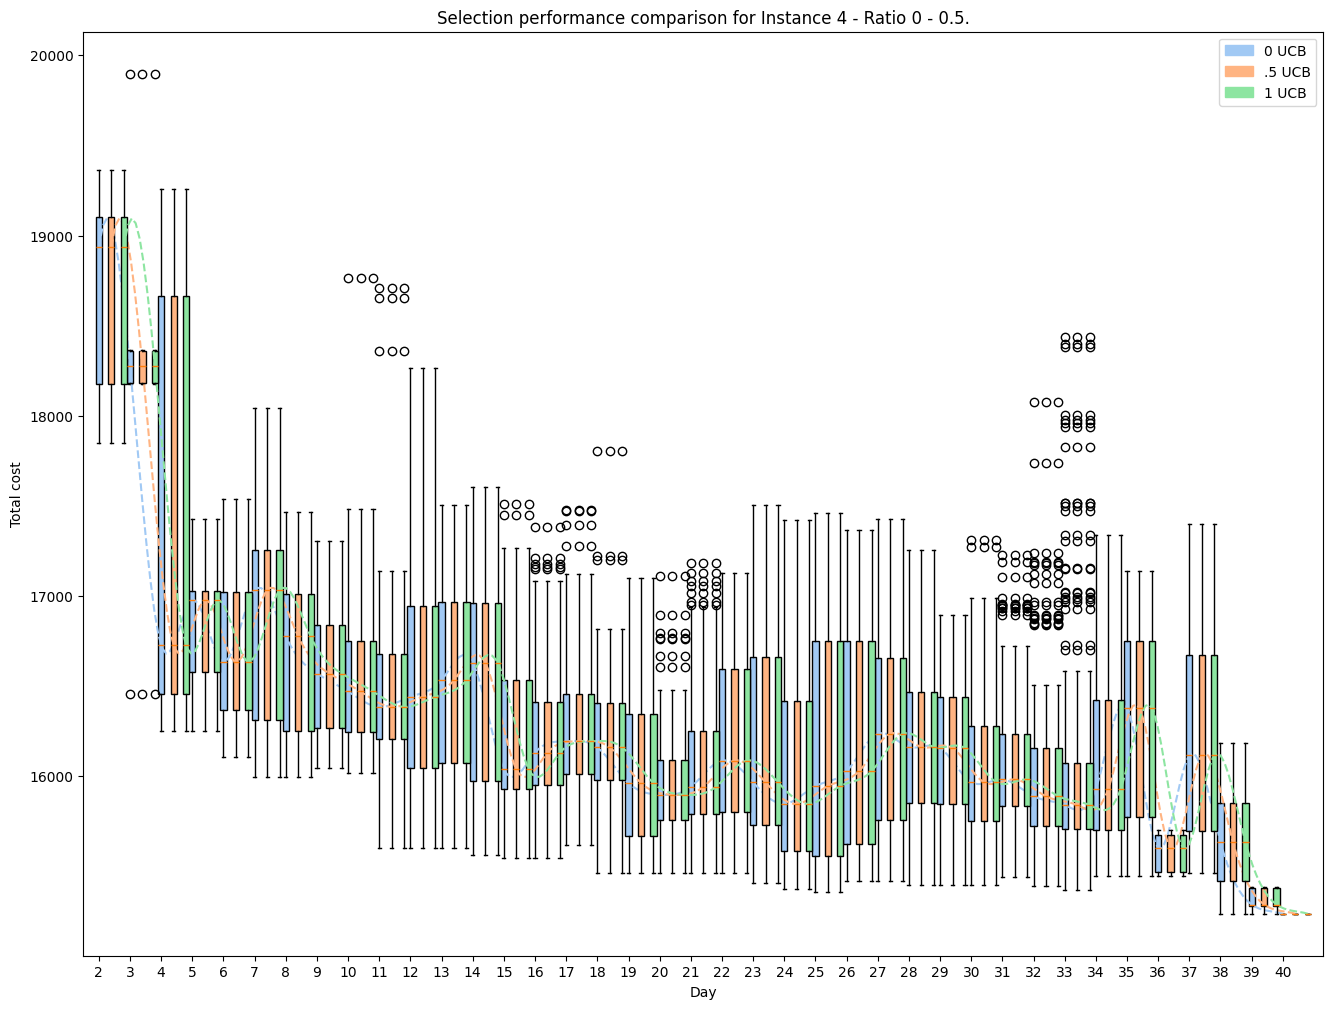

In [59]:
plot_multiple_datasets_with_quartile(
    {
    'data_3': dic_4_1['Simulation dictionnary'],
    'data_5':dic_4_0_5_ucbt['Simulation dictionnary'],
    'data_6':dic_4_1_ucbt['Simulation dictionnary']},
    hide_grid=True, 
    title="Selection performance comparison for Instance 4 - Ratio 0 - 0.5.", 
    legend=["0 UCB",".5 UCB","1 UCB","0 UCB1T","0.5UCB1T","1UCB1T"],
    compare_to_greedy=False,
    show_boxplot=True,
    interpolate=True,
    quartile_type='median',  # Choose 'min_max' or 'median' based on what you want to plot
    interpolation_type='polynomial',  # Choose 'linear' or 'polynomial' based on your interpolation preference
    figsize=(16, 12),  # Adjust the plot size if needed
)